<a href="https://colab.research.google.com/github/benasphy/hierarchical-clustering/blob/main/Hierarchical_Clustering_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster labels: [1 1 1 0 0 0]


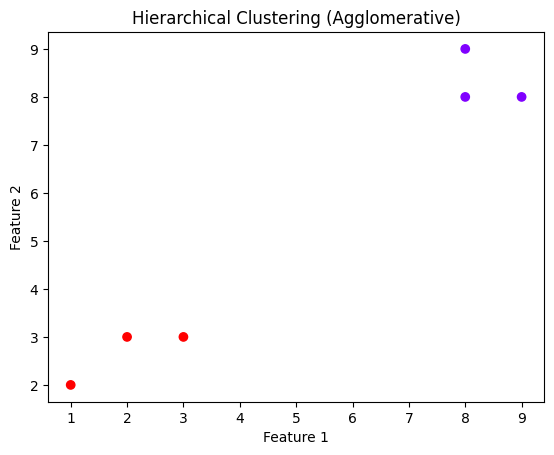

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class HierarchicalClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters

    def fit(self, X):
        n_samples = X.shape[0]

        # Step 1: start with each point as a cluster
        clusters = [[i] for i in range(n_samples)]

        # Step 2: compute initial distance matrix
        distances = np.full((n_samples, n_samples), np.inf)
        for i in range(n_samples):
            for j in range(i + 1, n_samples):
                distances[i, j] = np.linalg.norm(X[i] - X[j])
                distances[j, i] = distances[i, j]

        # Step 3: iteratively merge clusters
        while len(clusters) > self.n_clusters:
            # Find two closest clusters
            min_dist = np.inf
            closest_pair = None

            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    # Compute average linkage distance between clusters[i] and clusters[j]
                    dist = np.mean([
                        np.linalg.norm(X[p1] - X[p2])
                        for p1 in clusters[i] for p2 in clusters[j]
                    ])
                    if dist < min_dist:
                        min_dist = dist
                        closest_pair = (i, j)

            # Merge the two closest clusters
            c1, c2 = closest_pair
            new_cluster = clusters[c1] + clusters[c2]

            # Remove old and add new
            clusters.pop(max(c1, c2))
            clusters.pop(min(c1, c2))
            clusters.append(new_cluster)

        # Assign labels
        self.labels_ = np.zeros(n_samples, dtype=int)
        for idx, cluster in enumerate(clusters):
            for point_idx in cluster:
                self.labels_[point_idx] = idx

        return self

# ---------------------- Example Usage ----------------------
# Simple 2D dataset
X = np.array([
    [1, 2], [2, 3], [3, 3],    # cluster 1
    [8, 8], [8, 9], [9, 8]     # cluster 2
])

# Train
hc = HierarchicalClustering(n_clusters=2)
hc.fit(X)

print("Cluster labels:", hc.labels_)

# ---------------------- Visualization ----------------------
plt.scatter(X[:, 0], X[:, 1], c=hc.labels_, cmap='rainbow')
plt.title("Hierarchical Clustering (Agglomerative)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
